In [ ]:
!pip install memory_profiler


In [ ]:
!pip install imbalanced-learn


In [ ]:
# Loading neccesary libraries:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
import re
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report, make_scorer, f1_score
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import time
from memory_profiler import memory_usage




In [ ]:
from google.colab import drive
drive.mount('')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data=pd.read_csv('')
#Print that data imported successfully
print("Data imported successfully")
data.columns
data.shape


Data imported successfully


(24783, 7)

#Visualization

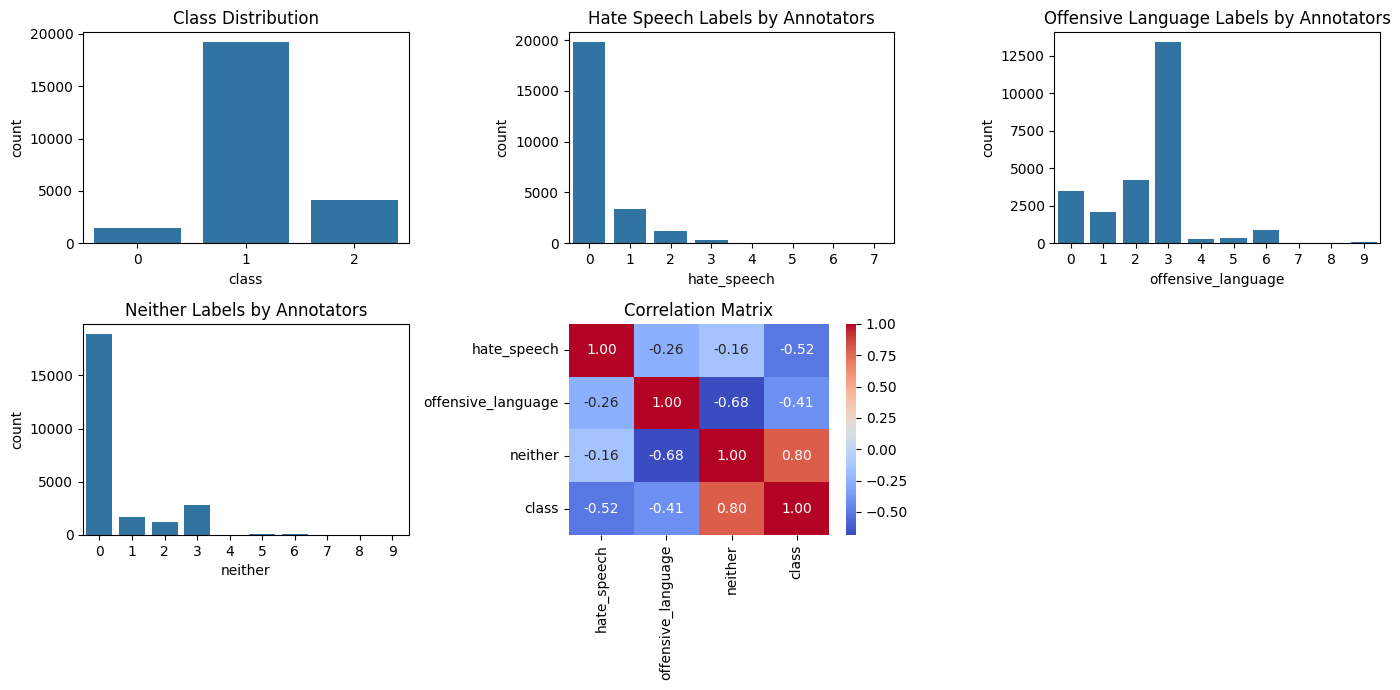

In [ ]:
# Setting up the matplotlib figure
plt.figure(figsize=(14, 7))

#  distribution of classes
plt.subplot(2, 3, 1)
sns.countplot(data=data,x='class' )
plt.title('Class Distribution')

#  hate speech
plt.subplot(2, 3, 2)
sns.countplot(x='hate_speech', data=data)
plt.title('Hate Speech Labels by Annotators')

#  offensive language
plt.subplot(2, 3, 3)
sns.countplot(x='offensive_language', data=data)
plt.title('Offensive Language Labels by Annotators')

#  neither
plt.subplot(2, 3, 4)
sns.countplot(x='neither', data=data)
plt.title('Neither Labels by Annotators')

# Heatmap of the correlation matrix to understand the relationships between annotations
plt.subplot(2, 3, 5)
corr = data[['hate_speech', 'offensive_language', 'neither', 'class']].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')

# Adjust the layout
plt.tight_layout()
plt.show()


In [ ]:

# drop the 'Unnamed: 0' column as it's just an identifier and not useful for modeling.
data.drop('Unnamed: 0', axis=1, inplace=True)



import re

def preprocess_tweet_text(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#', '', tweet)
    # Remove HTML tags
    tweet = re.sub(r'<.*?>', '', tweet)
    # Remove everything that is not letters
    tweet = re.sub(r'[^a-zA-Z]', ' ', tweet)
    # Convert text to lowercase
    tweet = tweet.lower()
    # Remove whitespaces
    tweet = tweet.strip()
    # Tokenize and join to remove unneccessary white spaces
    tweet = " ".join(tweet.split())
    return tweet

# Apply the preprocessing function to the 'tweet' column
data['processed_tweet'] = data['tweet'].apply(preprocess_tweet_text)

# Now let's look at the frequency of words in the tweets.
from collections import Counter

# Combining all tweets into one big text and created a list of words
all_words = ' '.join([text for text in data['processed_tweet']]).split()

# Calculating the frequency of each word
word_freq = Counter(all_words)

# Get most common words
most_common_words = word_freq.most_common(20)

most_common_words


[('i', 9775),
 ('a', 9558),
 ('bitch', 8342),
 ('rt', 7647),
 ('the', 7208),
 ('you', 6814),
 ('to', 5343),
 ('that', 4040),
 ('and', 3993),
 ('t', 3885),
 ('my', 3589),
 ('bitches', 3118),
 ('in', 3067),
 ('is', 2920),
 ('like', 2787),
 ('me', 2756),
 ('it', 2686),
 ('s', 2672),
 ('of', 2552),
 ('on', 2539)]

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))
porter = PorterStemmer()

# list of common words to be removed excluding "bitch" and "bitches"
common_words_to_remove = [word for word, _ in most_common_words if word.lower() not in ['bitch', 'bitches']]

# Function to remove stopwords, common words (except 'bitch' and 'bitches'), and performing stemming
def preprocess_text(text):
    words = word_tokenize(text)
    filtered_words = [porter.stem(word) for word in words if word.lower() not in stop_words and word.lower() not in common_words_to_remove]
    preprocessed_text = ' '.join(filtered_words)
    return preprocessed_text

# Apply preprocessing function to the 'processed_tweet' column
data['further_processed_tweet'] = data['processed_tweet'].apply(preprocess_text)





[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Initialize the TF-IDF Vectorizer
#This code changes tweets into numbers so a computer can understand and work with them. It picks out the most important words
#  and phrases from the tweets, including single words, pairs of words, and three-word groups, but only keeps the top 1000 to
#  keep things simple. Then, it calculates scores for these words and phrases based on how often they appear in a tweet and how
#  unique they are across all tweets. This way, each tweet is turned into a list of 1000 numbers, with each number showing how
#  important a specific word or phrase is in that tweet.



vectorizer = TfidfVectorizer(ngram_range=(1, 3),max_features=500)

# Apply TF-IDF to the  tweets
X = vectorizer.fit_transform(data['further_processed_tweet']).toarray()
print(X)

# Labels for classification
y = data['class']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.35963326]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [ ]:
nb = GaussianNB()
knn = KNeighborsClassifier()


#MileStone 2

In [ ]:
# import time
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.model_selection import cross_val_score
# from memory_profiler import memory_usage

# # Initializing classifiers
# lr = LogisticRegression(max_iter=1000)
# svm = SVC()

# def evaluation(model, X, y, cv, scoring):
#     start_time = time.time()
#     mem_usage = memory_usage((cross_val_score, (model, X, y), {'cv': cv, 'scoring': scoring}), interval=0.1, max_usage=True)
#     scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
#     end_time = time.time()
#     time_taken = end_time - start_time
#     mean_acc = scores.mean()
#     return mean_acc, time_taken, mem_usage

# # Evaluating Logistic Regression
# mean_acc_lr, time_lr, mem_lr = evaluation(lr, X_train, y_train, cv=2, scoring='accuracy')

# # Evaluating SVM
# mean_acc_svm, time_svm, mem_svm = evaluation(svm, X_train, y_train, cv=2, scoring='accuracy')

# print(f"Logistic Regression - Accuracy: {mean_acc_lr}, Time: {time_lr} seconds, Memory: {mem_lr} MiB")
# print(f"SVM - Accuracy: {mean_acc_svm}, Time: {time_svm} seconds, Memory: {mem_svm} MiB")


#Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
nb = GaussianNB()
knn = KNeighborsClassifier()


# Define hyperparameters to tune
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# Define scoring metrics
score_metrics = {'accuracy': 'accuracy',
                   'precision': make_scorer(precision_score, average='weighted'),
                   'recall': make_scorer(recall_score, average='weighted'),
                   'f1': make_scorer(f1_score, average='weighted')}

# Instantiate GridSearchCV for KNN
g_search = GridSearchCV(knn, param_grid, cv=5, scoring=score_metrics, refit='f1')

# Fit the GridSearchCV instance to the training data
g_search.fit(X_train, y_train)

# Get the best hyperparameters
ideal_para = g_search.best_params_

# Get the best mean F1-score
ideal_mean_f1 = g_search.best_score_

(ideal_para, ideal_mean_f1)



({'n_neighbors': 5}, 0.7840600566474956)

#Using Smote

In [ ]:

import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline # Import as ImPipeline to avoid confusion with sklearn's Pipeline





# scoring metrics
scoring_metrics = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}


smote = SMOTE(random_state=42)

# Create pipelines first oversample then run the classifier
pipeline_nb = ImPipeline([
    ('smote', smote),
    ('classifier', GaussianNB())
])
pipeline_knn = ImPipeline([
    ('smote', smote),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

# Performing cross-validation with the scoring metrics
cv_results_nb_smote = cross_validate(pipeline_nb, X_train, y_train, cv=5, scoring=scoring_metrics, return_train_score=False)
cv_results_knn_smote = cross_validate(pipeline_knn, X_train, y_train, cv=5, scoring=scoring_metrics, return_train_score=False)

# Calculating the mean scores across all folds for each classifier and each metric after addressing imbalance
mean_scores_nb_smote = {metric: np.mean(scores) for metric, scores in cv_results_nb_smote.items() if 'test_' in metric}
mean_scores_knn_smote = {metric: np.mean(scores) for metric, scores in cv_results_knn_smote.items() if 'test_' in metric}

(mean_scores_nb_smote, mean_scores_knn_smote)


({'test_accuracy': 0.5009094325728338,
  'test_precision': 0.7923450783277237,
  'test_recall': 0.5009094325728338,
  'test_f1': 0.5496036271993191},
 {'test_accuracy': 0.5355086075271587,
  'test_precision': 0.7974073236704177,
  'test_recall': 0.5355086075271587,
  'test_f1': 0.5959158916609334})

In [ ]:
import time
from memory_profiler import memory_usage
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_validate


smote = SMOTE(random_state=42)


pl_nb = Pipeline([('smote', smote), ('classifier', GaussianNB())])
pl_knn = Pipeline([('smote', smote), ('classifier', KNeighborsClassifier(n_neighbors=5))])


pl_nb.fit(X_train, y_train)
pl_knn.fit(X_train, y_train)

# function to perform prediction and measure time and memory
def calc_metrics(pipeline, X_test):
    start_time = time.time()

    # Make predictions
    y_pred = pipeline.predict(X_test)

    end_time = time.time()
    memory = memory_usage(max_usage=True)

    elapsed_time = end_time - start_time
    memory_utilized = memory

    return y_pred, elapsed_time, memory_utilized

# Predict with Naive Bayes pipeline
y_pred_nb, time_nb, memory_nb = calc_metrics(pl_nb, X_test)
print("Naive Bayes Prediction - Time: {:.4f} seconds, Memory: {:.4f} MiB".format(time_nb, memory_nb))

# Predict with KNN pipeline
y_pred_knn, time_knn, memory_knn = calc_metrics(pl_knn, X_test)
print("K-Nearest Neighbors Prediction - Time: {:.4f} seconds, Memory: {:.4f} MiB".format(time_knn, memory_knn))


print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

print("\nK-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))

Naive Bayes Prediction - Time: 0.0641 seconds, Memory: 800.9609 MiB
K-Nearest Neighbors Prediction - Time: 10.1005 seconds, Memory: 800.9609 MiB

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.11      0.50      0.18       290
           1       0.93      0.46      0.62      3832
           2       0.43      0.89      0.58       835

    accuracy                           0.54      4957
   macro avg       0.49      0.61      0.46      4957
weighted avg       0.80      0.54      0.58      4957


K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.12      0.58      0.19       290
           1       0.93      0.50      0.65      3832
           2       0.42      0.72      0.53       835

    accuracy                           0.54      4957
   macro avg       0.49      0.60      0.46      4957
weighted avg       0.80      0.54      0.60      4957



#MileStone 3

SVC with using just one set of parameters(may not be optimized)

In [ ]:
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

svm = SVC(C=1, gamma=0.01)


oversampler = RandomOverSampler(random_state=42)


pl_svm = Pipeline([('oversampler', oversampler), ('svm', svm)])


pl_svm.fit(X_train, y_train)


y_pred_svm = pl_svm.predict(X_test)


report_svm = classification_report(y_test, y_pred_svm, target_names=['Class 0', 'Class 1', 'Class 2'])

print(report_svm)



              precision    recall  f1-score   support

     Class 0       0.27      0.63      0.38       290
     Class 1       0.98      0.81      0.89      3832
     Class 2       0.72      0.95      0.82       835

    accuracy                           0.82      4957
   macro avg       0.65      0.79      0.69      4957
weighted avg       0.89      0.82      0.84      4957



In [ ]:
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, make_scorer, f1_score

svm = SVC()
oversampler = RandomOverSampler(random_state=42)
pl_svm = Pipeline([('oversampler', oversampler), ('svm', svm)])

# Defined the parameter grid for svm
para_grid = {
    'svm__C': [1, 10],
    'svm__gamma': [0.1, 1]
}

# score function
score = make_scorer(f1_score, average='weighted')

# Initialized GridSearchCV with pipeline and parameter grid
gsearch_svm = GridSearchCV(pl_svm, para_grid, scoring=score, cv=2, n_jobs=-1)


gsearch_svm.fit(X_train, y_train)

# best parameters and the corresponding score
ideal_para = gsearch_svm.best_params_
ideal_score = gsearch_svm.best_score_

# Used best estimator to make predictions

ideal_estimator = gsearch_svm.best_estimator_
y_pred = ideal_estimator.predict(X_test)


Findings = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1', 'Class 2'])


print(f"Best Parameters: {ideal_para}")
print(f"Best Score: {ideal_score}")
print("Classification Report:")
print(Findings)




Best Parameters: {'svm__C': 1, 'svm__gamma': 1}
Best Score: 0.8899012078040754
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.38      0.39      0.38       290
     Class 1       0.95      0.91      0.93      3832
     Class 2       0.78      0.94      0.85       835

    accuracy                           0.88      4957
   macro avg       0.70      0.74      0.72      4957
weighted avg       0.89      0.88      0.89      4957

Elapsed time: 1945.8981931209564 seconds
Memory used: 1321.0625 MiB


# Using best parameter

In [ ]:
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

svm = SVC(C=1, gamma=1)
#The higher the gamma value, the more it tries to exactly fit the training data set

# Define the oversampling strategy
oversampler = RandomOverSampler(random_state=42)

# Create the pipeline
pl_svm = Pipeline([('oversampler', oversampler), ('svm', svm)])
start_time = time.time()

# Fit the pipeline to the training data
pl_svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = pl_svm.predict(X_test)
end_time = time.time()
memory = memory_usage(max_usage=True)


# Generate the classification report
report_svm = classification_report(y_test, y_pred_svm, target_names=['Class 0', 'Class 1', 'Class 2'])
elapsed_time = end_time - start_time

print(report_svm)
print(f"Elapsed time: {elapsed_time} seconds")
print(f"Memory used: {memory} MiB")


              precision    recall  f1-score   support

     Class 0       0.38      0.39      0.38       290
     Class 1       0.95      0.91      0.93      3832
     Class 2       0.78      0.94      0.85       835

    accuracy                           0.88      4957
   macro avg       0.70      0.74      0.72      4957
weighted avg       0.89      0.88      0.89      4957

Elapsed time: 909.41481757164 seconds
Memory used: 932.99609375 MiB


# Logistic Regression

In [ ]:
# Define the classifier and parameters for hyperparameter tuning
lr = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
parameters = {
    'logistic_reg__C': [0.01, 0.1, 1, 10, 100],
    'logistic_reg__penalty': ['l2']  # 'lbfgs' solver supports only 'l2' or 'none' penalties
}

# Oversampling
oversampler = RandomOverSampler(random_state=42)
pl_lr = Pipeline([('oversampler', oversampler), ('logistic_reg', lr)])

#  Scorung metric based on F1 score
f1_score = make_scorer(f1_score, average='weighted')

# Setting up the GridSearchCV
g_search = GridSearchCV(pl_lr, parameters, scoring=f1_score, cv=5)

# Fit the GridSearchCV to find the best parameters
g_search.fit(X_train, y_train)

# Ideal parameters and score
ideal_para = g_search.best_params_
ideal_score = g_search.best_score_

# Using ideal values  to make predictions on the test set
ideal_lr = g_search.best_estimator_
y_pred_lr = ideal_lr.predict(X_test)


lr_report = classification_report(y_test, y_pred_lr, target_names=['Class 0', 'Class 1', 'Class 2'])

(ideal_para, ideal_score, lr_report)


({'logistic_reg__C': 0.01, 'logistic_reg__penalty': 'l2'},
 0.8486466587239109,
 '              precision    recall  f1-score   support\n\n     Class 0       0.27      0.61      0.38       290\n     Class 1       0.97      0.81      0.89      3832\n     Class 2       0.70      0.94      0.80       835\n\n    accuracy                           0.82      4957\n   macro avg       0.65      0.79      0.69      4957\nweighted avg       0.89      0.82      0.84      4957\n')

# Logistic Regression Using optimized parameters


In [ ]:
lr = LogisticRegression(C=0.01, penalty='l2', solver='lbfgs', max_iter=1000)#Limited-memory Broyden–Fletcher–Goldfarb–Shanno algorithm
#The 'l2' penalty is the sum of the square of the coefficients This type of penalty encourages the model coefficients to be small
#maximum number of iterations taken for the solvers to converge
oversampler = RandomOverSampler(random_state=42)

# Create the pipeline
pl_lr = Pipeline([('oversampler', oversampler), ('logistic_reg', lr)])

start_time = time.time()

# Fit the pipeline to the training data
pl_lr.fit(X_train, y_train)

# Making predictions on the test data
y_pred_lr = pl_lr.predict(X_test)

end_time = time.time()
memory = memory_usage(max_usage=True)


report_lr = classification_report(y_test, y_pred_lr, target_names=['Class 0', 'Class 1', 'Class 2'])
elapsed_time = end_time - start_time

print(report_lr)
print(f"Elapsed time: {elapsed_time} seconds")
print(f"Memory used: {memory} MiB")


              precision    recall  f1-score   support

     Class 0       0.27      0.61      0.38       290
     Class 1       0.97      0.81      0.89      3832
     Class 2       0.70      0.94      0.80       835

    accuracy                           0.82      4957
   macro avg       0.65      0.79      0.69      4957
weighted avg       0.89      0.82      0.84      4957

Elapsed time: 5.2743189334869385 seconds
Memory used: 1495.35546875 MiB


# **Tried doing both in one go didnt work**

In [ ]:
#both combined
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline


svc = SVC()
lr = LogisticRegression()


scores = {'f1': make_scorer(f1_score, average='weighted')}


parameters_svc = {'svc__C': [0.1, 1],
                  'svc__gamma': [0.1, 0.01]}
parameters_lr = {'logistic_reg__C': [0.1, 1],
                  'logistic_reg__penalty': ['l1', 'l2']}

oversampler = RandomOverSampler()


pl_svc = Pipeline([('oversampler', oversampler), ('svc', svc)])
pl_lr = Pipeline([('oversampler', oversampler), ('logistic_reg', lr)])


gsearch_svc = GridSearchCV(pl_svc, parameters_svc, scoring=scores, refit='f1')
gsearch_lr = GridSearchCV(pl_lr, parameters_lr, scoring=scores, refit='f1')

gsearch_svc.fit(X_train, y_train)
gsearch_lr.fit(X_train, y_train)


idealpara_svc = gsearch_svc.best_params_
idealpara_lr = gsearch_lr.best_params_
idealf1_svc = gsearch_svc.best_score_
idealf1_lr = gsearch_lr.best_score_

(idealpara_svc, idealpara_lr, idealf1_svc, idealf1_lr)
